# Stock Price Prediction Using Linear Regression

#### IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### IMPORTING DATASET

In [4]:
df = pd.read_excel('data.xlsx')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
df.shape

(1009, 7)

In [7]:
df.info

<bound method DataFrame.info of            Date        Open        High         Low       Close   Adj Close   
0    2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995  \
1    2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2    2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3    2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4    2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...         ...         ...         ...         ...         ...         ...   
1004 2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005 2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006 2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007 2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008 2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0 

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06


In [10]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [11]:
print('Starting date:',df.iloc[0][0])
print('Ending date: ',df.iloc[-1][0])

Starting date: 2018-02-05 00:00:00
Ending date:  2022-02-04 00:00:00


In [12]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [13]:
df['Date']

0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

In [14]:
df.describe

<bound method NDFrame.describe of            Date        Open        High         Low       Close   Adj Close   
0    2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995  \
1    2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2    2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3    2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4    2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...         ...         ...         ...         ...         ...         ...   
1004 2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005 2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006 2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007 2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008 2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  


In [15]:
df.shape

(1009, 7)

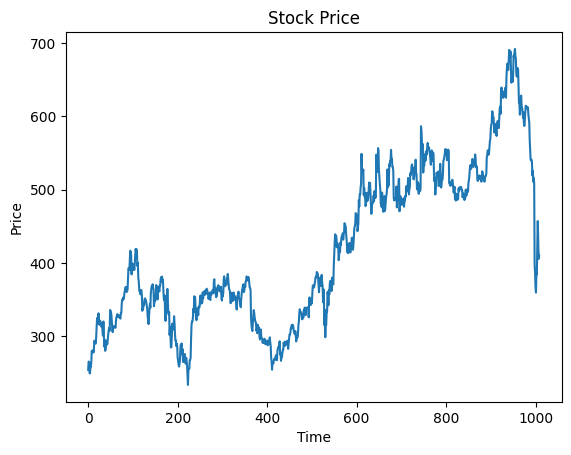

In [16]:
df['Close'].plot()
plt.title("Stock Price")
plt.ylabel('Price')
plt.xlabel('Time')
plt.show()

### Splitting the data into Training and Test Data

In [17]:
x = df[['Open','High','Low','Volume']]
y = df['Close']

In [18]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15, shuffle = False, random_state = 0)

In [19]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(857, 4)
(152, 4)
(857,)
(152,)


### LINEAR REGRESSION

In [20]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [21]:
model.score(test_x, test_y) #Linear Regression confidence

0.9959762038582468

### Prediction for the test dataset

In [22]:
model.fit(train_x, train_y)
predicted = model.predict(test_x)
print(test_x.head())

           Open        High         Low   Volume
857  525.719971  537.039978  525.719971  2805400
858  535.500000  538.539978  529.390015  1975500
859  533.000000  542.859985  533.000000  2775100
860  544.239990  544.640015  531.659973  2722500
861  530.929993  535.500000  529.090027  3269000


In [23]:
predicted.shape

(152,)

In [24]:
pred = pd.DataFrame({'Actual_Price':test_y,'Predicted_Price':predicted})
pred.head()

,Actual_Price,Predicted_Price
857,533.539978,534.883979
858,533.979980,533.070929
859,541.640015,541.000595
860,535.960022,534.495131
861,530.760010,533.246677


In [25]:
pred.describe()

,Actual_Price,Predicted_Price
count,152.000000,152.000000
mean,576.121183,575.989738
std,72.062144,72.542541
min,359.700012,361.798357
25%,530.647507,530.199616
50%,589.940002,586.371753
75%,627.299988,627.972714
max,691.690002,695.752250


#### Evaluating the metrics of the model

In [26]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error: ', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error:  3.397676147051949
Mean Squared Error:  20.75791298789252
Root Mean Squared Error : 4.556085270041872


In [27]:
x2 = pred.Actual_Price.mean()
y2 = pred.Predicted_Price.mean()
Accuracy = x2/y2*100

In [28]:
print('Accuracy of the model :',Accuracy,'%')

Accuracy of the model : 100.022820593142 %


## Plot between Actual Price Vs Predicted Price

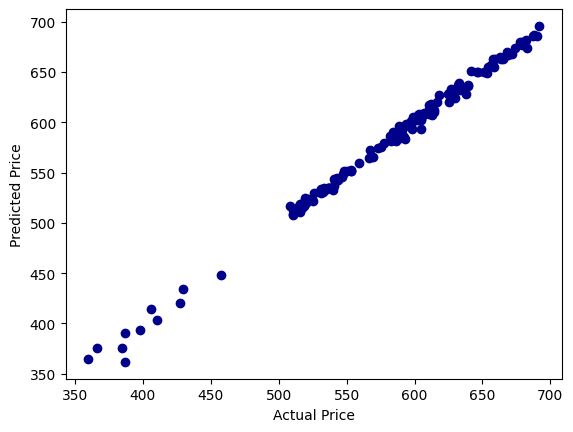

In [29]:
plt.scatter(pred.Actual_Price, pred.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

### Predicted Price vs Actual Price on Time Series plot

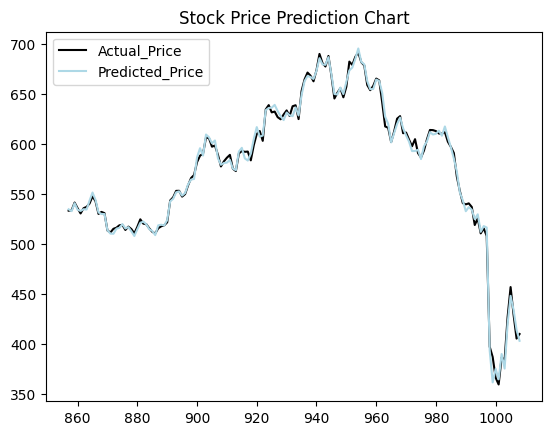

In [30]:
plt.plot(pred.Actual_Price, color='black')
plt.plot(pred.Predicted_Price, color='lightblue')
plt.title("Stock Price Prediction Chart")
plt.legend(["Actual_Price","Predicted_Price"])
plt.show()